<a href="https://colab.research.google.com/github/rukendar/Rukendar.s/blob/main/Clustering_10_02_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
file_path = '/content/drive/MyDrive/Assignments_excelr/income.csv'
df = pd.read_csv(file_path)
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


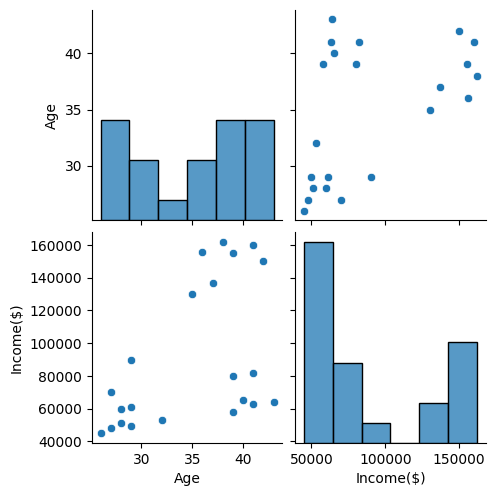

In [4]:
sns.pairplot(df)

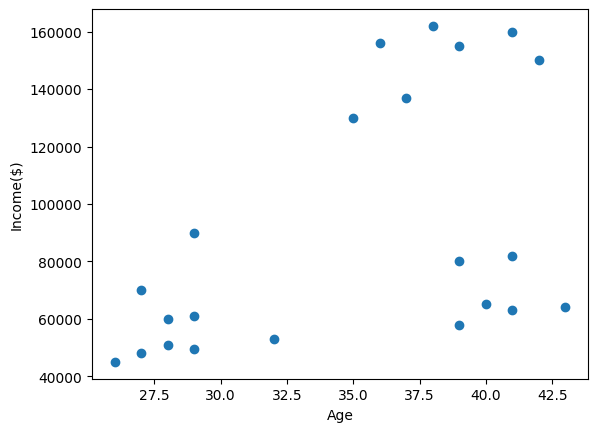

In [5]:
plt.scatter(df['Age'],df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.show()

In [6]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [16]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [17]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 3, 3, 3, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [9]:
scaler = MinMaxScaler()
df[['Income($)']] = scaler.fit_transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [10]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [18]:
km.cluster_centers_

array([[0.8627451 , 0.94017094],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.61764706, 0.86538462]])

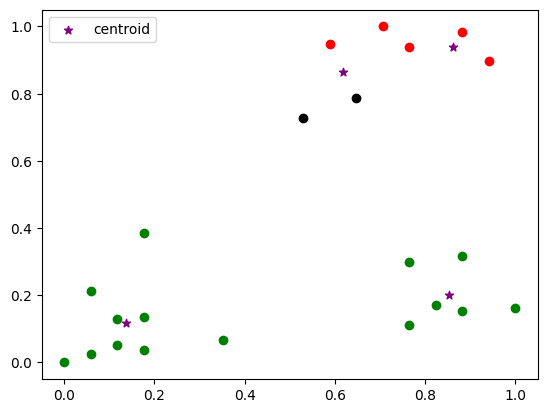

In [19]:
df1= df[df.cluster==0]
df2= df[df.cluster==1]
df3= df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()